In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import compare_psnr



%matplotlib inline

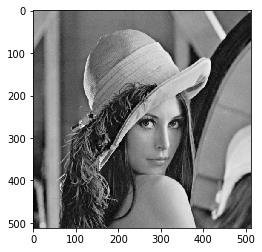

In [27]:
lena = cv2.imread('./images/lena_gray_512.tif',0)
plt.imshow(lena,cmap='gray')

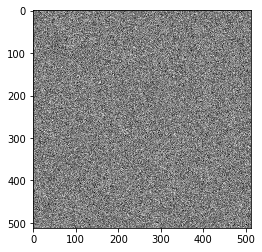

In [28]:
#Defining Gaussian noise with mean = 0 and standard deviation 25
gaussian_noise = np.random.normal(0, 25, lena.shape) 
plt.imshow(gaussian_noise,cmap='gray')

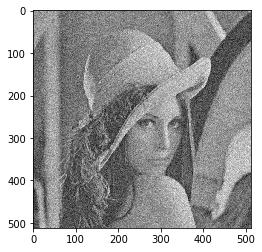

In [29]:
#Adding Gaussian noise
gaussian_lena = lena + gaussian_noise
plt.imshow(gaussian_lena,cmap='gray')

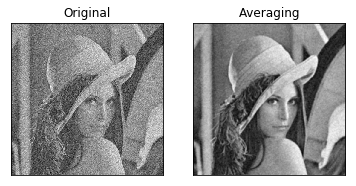

28.2989447046


In [30]:
#Denoising using average filter
avg_kernel = np.ones((5,5),np.float32)/25
denoise_lena = cv2.filter2D(gaussian_lena,-1,avg_kernel)
plt.subplot(121),plt.imshow(gaussian_lena,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(denoise_lena,cmap='gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
print compare_psnr(lena,denoise_lena.astype('uint8'),data_range=255)

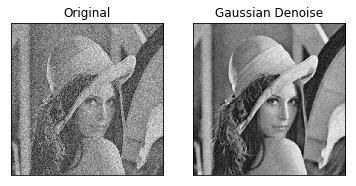

29.0727587808


In [31]:
#Denoising using Gaussian filter
denoise_lena = cv2.GaussianBlur(gaussian_lena,(5,5),0)
plt.subplot(121),plt.imshow(gaussian_lena,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(denoise_lena,cmap='gray'),plt.title('Gaussian Denoise')
plt.xticks([]), plt.yticks([])
plt.show()
print compare_psnr(lena,denoise_lena.astype('uint8'),data_range=255)

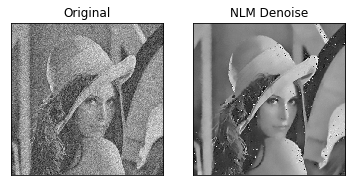

24.6835159972


In [32]:
#Denoising using Non Local Means
denoise_lena = cv2.fastNlMeansDenoising(gaussian_lena.astype('uint8'),None,25,7,21)
plt.subplot(121),plt.imshow(gaussian_lena,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(denoise_lena,cmap='gray'),plt.title('NLM Denoise')
plt.xticks([]), plt.yticks([])
plt.show()
print compare_psnr(lena,denoise_lena,data_range=255)